In [5]:
def Fr(data,year):
    import pandas as pd
    data2=data.iloc[data['Accper'].values==str(year)+'-12-31',[ 0,2,3,4,5,6,7,8,9,10,11]]
    data2=data2[data2>0]
    data2=data2.dropna()
    from sklearn.preprocessing import StandardScaler  
    X=data2.iloc[:,1:]
    scaler = StandardScaler()
    scaler.fit(X) 
    X=scaler.transform(X)  
    from sklearn.decomposition import PCA 
    pca=PCA(n_components=0.95)      #累计贡献率为95%
    Y=pca.fit_transform(X)            #满足累计贡献率为95%的主成分数据
    gxl=pca.explained_variance_ratio_   #贡献率
    import numpy as np
    F=np.zeros((len(Y)))
    for i in range(len(gxl)):
        f=Y[:,i]*gxl[i]
        F=F+f
    fs1=pd.Series(F,index=data2['Stkcd'].values)
    Fscore1=fs1.sort_values(ascending=False)   #降序，True为升序
    co=pd.read_excel('TRD_Co.xlsx')
    Co=pd.Series(co['Stknme'].values,index=co['Stkcd'].values)
    Co1=Co[data2['Stkcd'].values]
    fs2=pd.Series(F,index=Co1.values)
    Fscore2=fs2.sort_values(ascending=False)   #降序，True为升序
    return (Fscore1,Fscore2)
def get_keydata(dt,num):
    import pandas as pd
    import numpy as np
    s=dt[1:len(dt)-1]
    s1=dt[0:len(dt)-2]
    s2=dt[2:len(dt)]
    sd=abs(s.values-(s1.values+s2.values)/2)
    SSd=pd.Series(sd,index=np.arange(1,len(dt)-1))
    SSd=SSd.sort_values(ascending=False)
    SSd=SSd[0:num-2]
    st=pd.Series([dt[0],dt[len(dt)-1]],index=[0,len(dt)-1])
    # SSd=SSd.append(st)
    SSd = pd.concat([SSd, st], axis=0)
    keydata=dt[SSd.index].sort_index()
    return keydata
def get_tz(keydata):
    import numpy as np
    y1=keydata.values[1:]
    y2=keydata.values[0:-1]
    x1=keydata.index[1:]
    x2=keydata.index[0:-1]
    tan=list((y2-y1)/(x2-x1))
    T=np.array(tan)
    I7=T>0.5
    i1=T>0.2
    i2=T<=0.5
    I6=i1&i2
    i1=T>0.1
    i2=T<=0.2
    I5=i1&i2
    i1=T>-0.1
    i2=T<=0.1
    I4=i1&i2
    i1=T>-0.2
    i2=T<=-0.1
    I3=i1&i2
    i1=T>=-0.5
    i2=T<=-0.2
    I2=i1&i2
    I1=T<-0.5
    T[I1]=1
    T[I2]=2
    T[I3]=3
    T[I4]=4
    T[I5]=5
    T[I6]=6
    T[I7]=7
    return T

In [36]:
import pandas as pd  
dta=pd.read_excel('ddata.xlsx')
r=Fr(dta,'2016')
c=r[0][0:400]
cn=r[1][0:400]
code=list(c.index) 

td=pd.read_excel('交易日历数据表.xlsx')
I1=td['Clddt'].values>'2017-05-01'
I2=td['Clddt'].values<'2017-07-30'
I=I1&I2
ddt=td.loc[I,['Clddt']]
M=len(ddt)
import numpy as np
num=13
p=-1
DA=pd.read_excel('DA.xlsx') 
#预定义股票价格走势特征化数据，第0列为股票代码，其余为特征化数据（num-1个）
Data=np.zeros((len(code),num))
#预定义股票价格走势关键点数据，第0列为股票代码，其余为关键点数据（num个）
KeyData=np.zeros((len(code),num+1))
#预定义股票价格走势关键点下标，第0列为股票代码，其余为关键点下标（num个）
KeyData_index=np.zeros((len(code),num+1))
#对每一个股票代码，提取其关键点数据、计算其特征化数据，同时对关键点数据标准化处#理（极差法）
for t in range(len(code)):
    data=DA.loc[DA.iloc[:,0].values==code[t],['Trddt','Clsprc']]
    I1=data['Trddt'].values>'2017-05-01'
    I2=data['Trddt'].values<'2017-07-30'
    I=I1&I2
    #提取第t个股票代码的价格数据，同时下标重排，从0开始
    dt=data.loc[I,['Clsprc']]['Clsprc']
    dt=pd.Series(dt.values,index=range(len(dt)))
    if len(dt)==M:
        p=p+1
        keydata=get_keydata(dt,num)
        T=get_tz(keydata)
        y=keydata
        KeyData[p,0]=code[t]
        Data[p,0]=code[t]
        Data[p,1:]=T
        KeyData_index[p,0]=code[t]
        KeyData[p,1:]=(y.values-min(y.values))/(max(y.values)-min(y.values))
        KeyData_index[p,1:]=y.index
Data=Data[0:p,:]
KeyData=KeyData[0:p,:]
KeyData_index=KeyData_index[0:p,:]


C:\Users\16405\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(algorithm='elkan', max_iter=10000, n_clusters=20, random_state=0)

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.05260892114604877')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.03866288475561651')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.010685020613527784')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.014496659896182559')

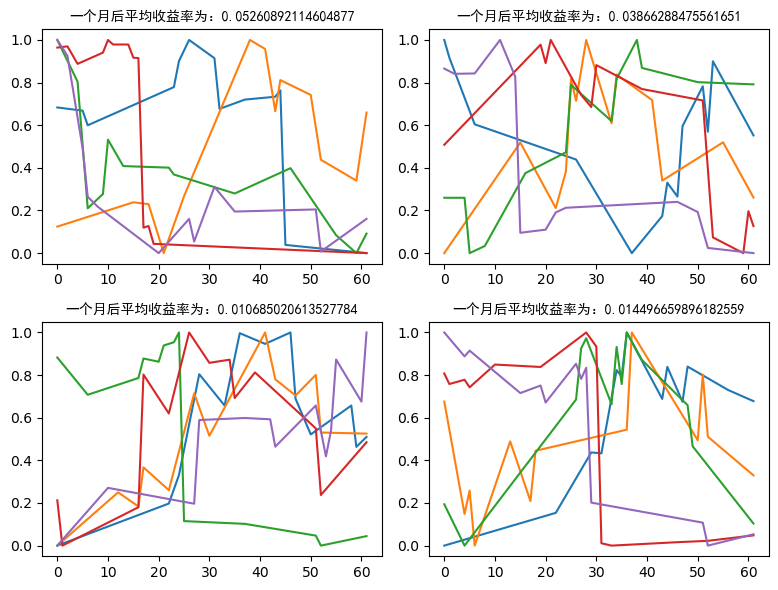

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.0499338523718061')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.0005293522780638979')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.041294739764698114')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.022666143370032907')

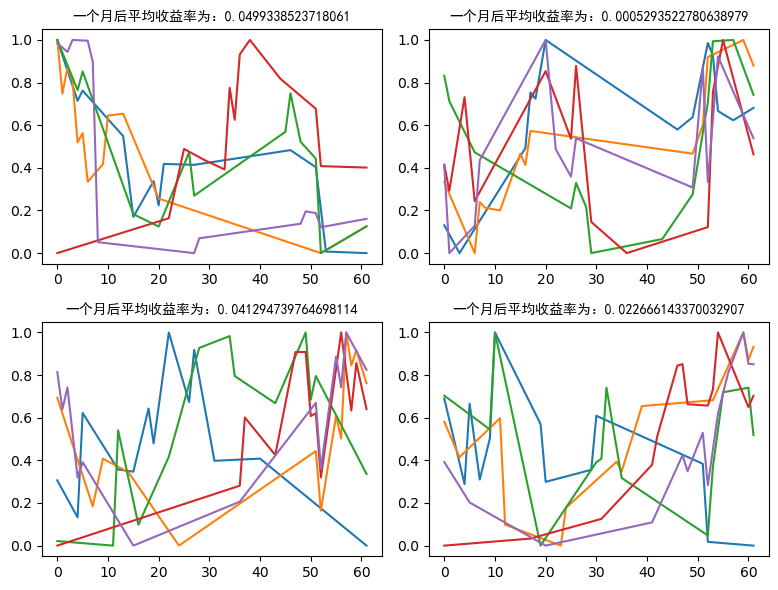

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.02772714021402271')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.004417827039106166')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.05224538314346732')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.004690808724245965')

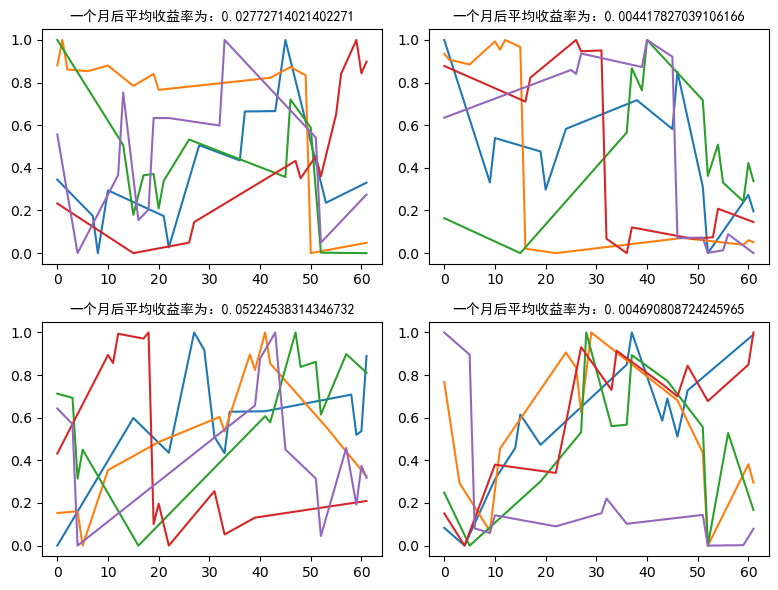

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.005437719026956998')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.02531426988755467')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.022712809754179587')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.020006736831026037')

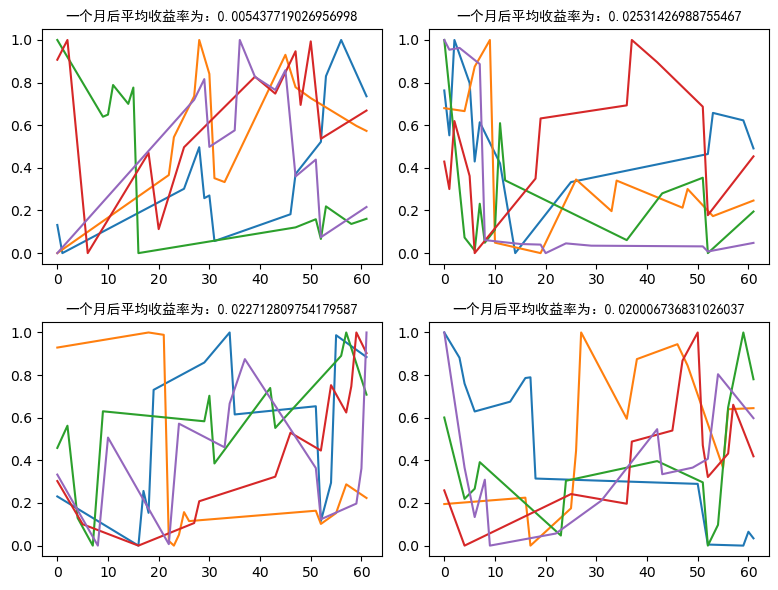

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.0372006000155881')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.037370305854538315')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：-0.0032116288276035185')

<AxesSubplot:>

Text(0.5, 1.0, '一个月后平均收益率为：0.020834367921302124')

<Figure size 640x480 with 0 Axes>

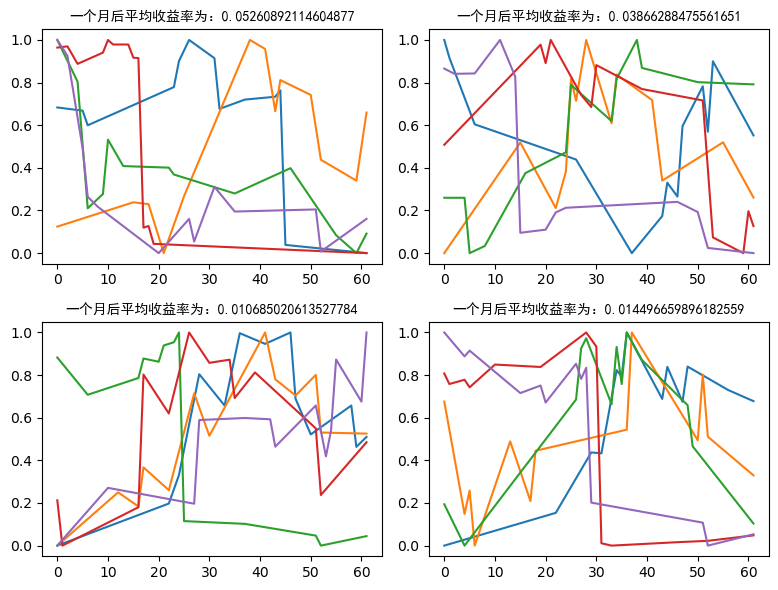

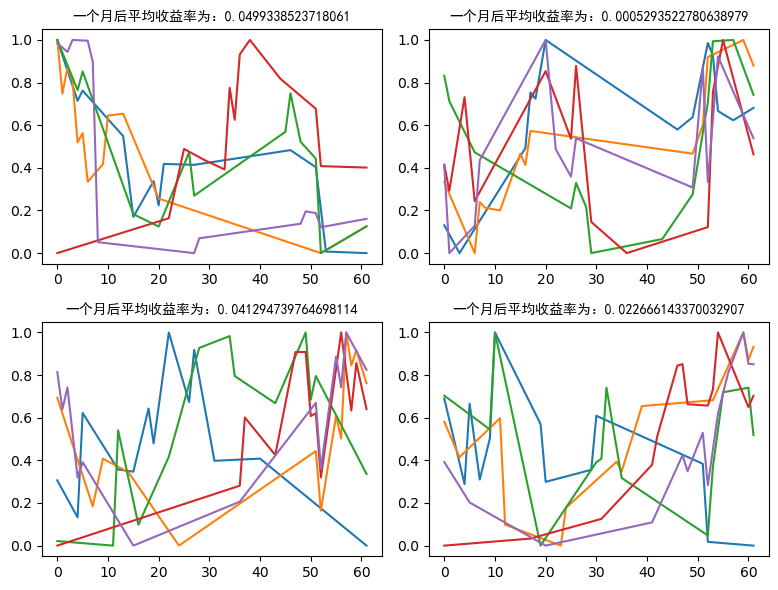

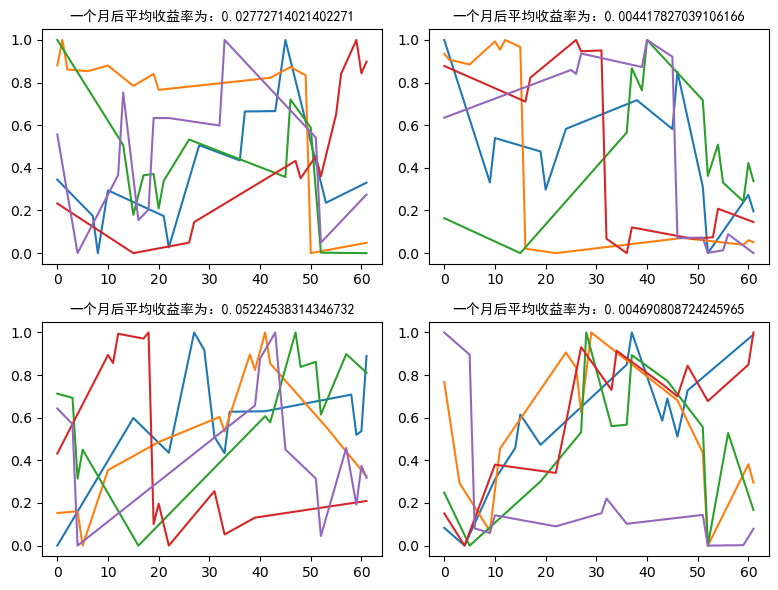

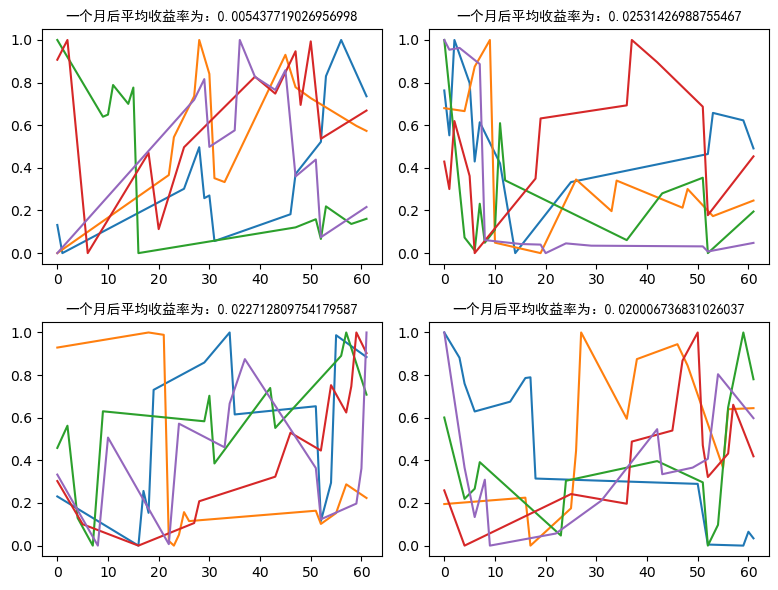

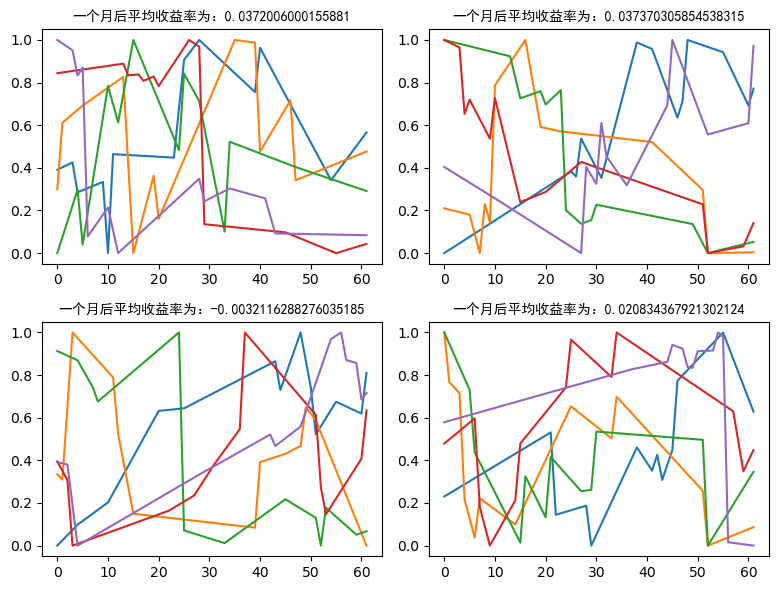

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 20, random_state=0, max_iter = 10000, algorithm="elkan") 
model.fit(Data[:,1:]) 
c=model.labels_ 
KeyData_c=np.hstack((KeyData,c.reshape(p,1)))
KeyData_index_c=np.hstack((KeyData_index,c.reshape(p,1)))
Data_c=np.hstack((Data,c.reshape(p,1)))

   
list_code=[]
list_codec=[]
list_r=[]
list_cr=[]
for t in range(20):
    code_t=KeyData_c[KeyData_c[:,len(KeyData_c[0,:])-1]==t,0]
    r_t=0
    count_t=0
    for i in range(len(code_t)):
        I1=DA['Trddt'].values>'2017-08-01'
        I2=DA['Trddt'].values<'2017-08-30'
        I3=DA['Stkcd'].values==code_t[i]
        I=I1&I2&I3
        dta=DA.iloc[I,[2]]['Clsprc'].values
        if len(dta)>1:
           r=(dta[len(dta)-1]-dta[0])/dta[0]
           list_code.append(code_t[i])
           list_codec.append(t)
           list_r.append(r)
           r_t=r_t+r
           count_t=count_t+1
    list_cr.append(r_t/count_t)
D={'股票代码':list_code,'类别':list_codec,'收益率':list_r}
D=pd.DataFrame(D)

import matplotlib.pyplot as plt
p=0
for t in range(20):
    dat1=KeyData_c[KeyData_c[:,len(KeyData_c[0,:])-1]==t,1:-1]
    dat2=KeyData_index_c[KeyData_index_c[:,len(KeyData_index_c[0,:])-1]==t,1:-1]
    if t%4==0: 
        p=p+1
        plt.figure(p)
        plt.figure(figsize=(8,6))
        
    plt.subplot(2,2,t%4+1)
    plt.title(u'一个月后平均收益率为：'+str(list_cr[t]),fontproperties='SimHei',size=10)
    plt.tight_layout()
    for k in range(5):
        if k<len(dat1):
           plt.plot(dat2[k,:],dat1[k,:])
    plt.savefig(str(p))